In [1]:
# !conda install -c conda-forge statsmodels -y

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose, STL

## 데이터 불러오기

In [3]:
df = pd.read_csv("data/jj.csv")
df["year"] = pd.DatetimeIndex(df["date"]).year

## 시계열 데이터 분리

In [4]:
advacned_decompositon = STL(df.data, period=4).fit()

<function matplotlib.pyplot.tight_layout(*, pad: 'float' = 1.08, h_pad: 'float | None' = None, w_pad: 'float | None' = None, rect: 'tuple[float, float, float, float] | None' = None) -> 'None'>

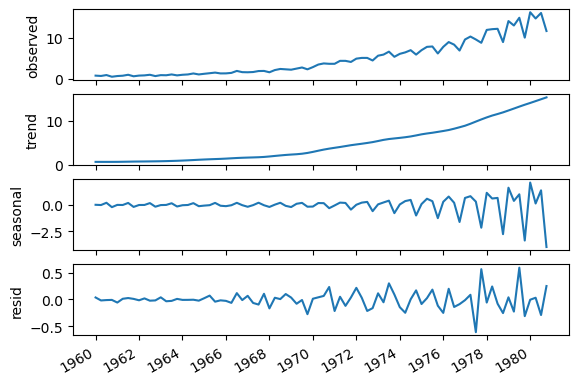

In [5]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=4, ncols=1, sharex=True)
ax1.plot(advacned_decompositon.observed)
ax1.set_ylabel("observed")
ax2.plot(advacned_decompositon.trend)
ax2.set_ylabel("trend")
ax3.plot(advacned_decompositon.seasonal)
ax3.set_ylabel("seasonal")
ax4.plot(advacned_decompositon.resid)
ax4.set_ylabel("resid")
plt.xticks(
    np.arange(0, 85, 8),
    [1960, 1962, 1964, 1966, 1968, 1970, 1972, 1974, 1976, 1978, 1980]
)
fig.autofmt_xdate()
plt.tight_layout

## AR,MA 등을 활용한 간단한 예제

In [6]:
df.head()

,date,data,year
0,1960-01-01,0.71,1960
1,1960-04-01,0.63,1960
2,1960-07-02,0.85,1960
3,1960-10-01,0.44,1960
4,1961-01-01,0.61,1961


In [7]:
df.tail()

,date,data,year
79,1979-10-01,9.99,1979
80,1980-01-01,16.20,1980
81,1980-04-01,14.67,1980
82,1980-07-02,16.02,1980
83,1980-10-01,11.61,1980


<function matplotlib.pyplot.tight_layout(*, pad: 'float' = 1.08, h_pad: 'float | None' = None, w_pad: 'float | None' = None, rect: 'tuple[float, float, float, float] | None' = None) -> 'None'>

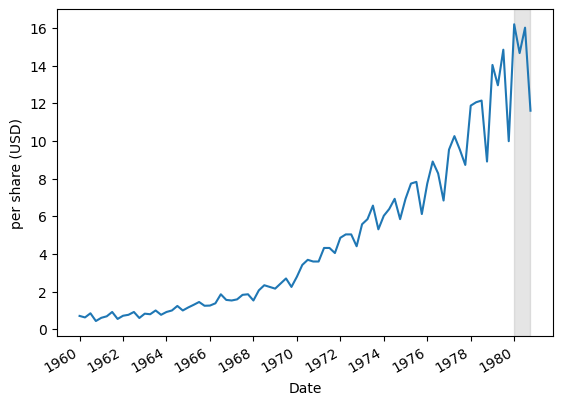

In [8]:
fig, ax = plt.subplots()

ax.plot(df["date"], df["data"])
ax.set_xlabel("Date")
ax.set_ylabel("per share (USD)")
ax.axvspan(80,83, color="#808080", alpha=0.2)

plt.xticks(
    np.arange(0, 85, 8),
    [1960, 1962, 1964, 1966, 1968, 1970, 1972, 1974, 1976, 1978, 1980]
)

fig.autofmt_xdate()
plt.tight_layout

In [9]:
train = df[:-4]
test = df[-4:]

In [10]:
historical_mean = np.mean(train["data"])
historical_mean

4.308499987499999

In [11]:
test.loc[:, "pred_mean"] = historical_mean

C:\Users\user\AppData\Local\Temp\ipykernel_14956\4286354812.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.loc[:, "pred_mean"] = historical_mean


In [12]:
def mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [13]:
mape_historical_mean = mape(test["data"], test["pred_mean"])
mape_historical_mean

70.00752579965119

<function matplotlib.pyplot.tight_layout(*, pad: 'float' = 1.08, h_pad: 'float | None' = None, w_pad: 'float | None' = None, rect: 'tuple[float, float, float, float] | None' = None) -> 'None'>

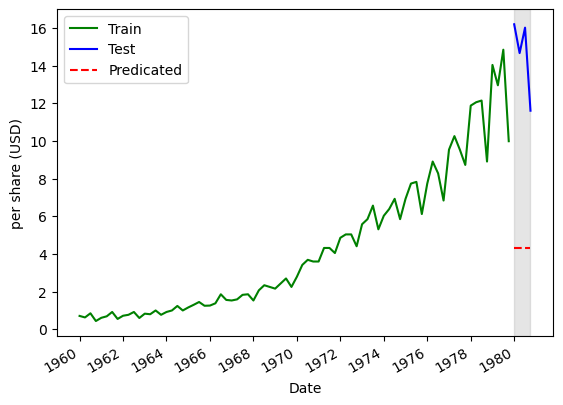

In [14]:
fig, ax = plt.subplots()

ax.plot(train["date"], train["data"], "g-", label="Train")
ax.plot(test["date"], test["data"], "b-", label="Test")
ax.plot(test["date"], test["pred_mean"], "r--", label="Predicated")

ax.set_xlabel("Date")
ax.set_ylabel("per share (USD)")
ax.axvspan(80,83, color="#808080", alpha=0.2)
ax.legend(loc=2)

plt.xticks(
    np.arange(0, 85, 8),
    [1960, 1962, 1964, 1966, 1968, 1970, 1972, 1974, 1976, 1978, 1980]
)

fig.autofmt_xdate()
plt.tight_layout

### MA

In [15]:
last_year_mean = np.mean(train["data"][-4:])
test.loc[:, "pred_last_year_mean"] = last_year_mean
mape_last_year_mean = mape(test["data"], test["pred_last_year_mean"])
mape_last_year_mean

C:\Users\user\AppData\Local\Temp\ipykernel_14956\4169747460.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.loc[:, "pred_last_year_mean"] = last_year_mean


15.5963680725103

<function matplotlib.pyplot.tight_layout(*, pad: 'float' = 1.08, h_pad: 'float | None' = None, w_pad: 'float | None' = None, rect: 'tuple[float, float, float, float] | None' = None) -> 'None'>

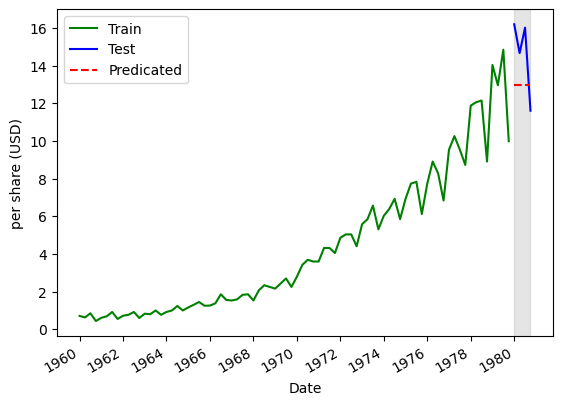

In [16]:
fig, ax = plt.subplots()

ax.plot(train["date"], train["data"], "g-", label="Train")
ax.plot(test["date"], test["data"], "b-", label="Test")
ax.plot(test["date"], test["pred_last_year_mean"], "r--", label="Predicated")

ax.set_xlabel("Date")
ax.set_ylabel("per share (USD)")
ax.axvspan(80,83, color="#808080", alpha=0.2)
ax.legend(loc=2)

plt.xticks(
    np.arange(0, 85, 8),
    [1960, 1962, 1964, 1966, 1968, 1970, 1972, 1974, 1976, 1978, 1980]
)

fig.autofmt_xdate()
plt.tight_layout

In [17]:
test.loc[:,"pred_last_season"] = train["data"][-4:].values
mape_last_year_mean = mape(test["data"], test["pred_last_season"])
mape_last_year_mean

C:\Users\user\AppData\Local\Temp\ipykernel_14956\2804004222.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.loc[:,"pred_last_season"] = train["data"][-4:].values


11.561658552433654

<function matplotlib.pyplot.tight_layout(*, pad: 'float' = 1.08, h_pad: 'float | None' = None, w_pad: 'float | None' = None, rect: 'tuple[float, float, float, float] | None' = None) -> 'None'>

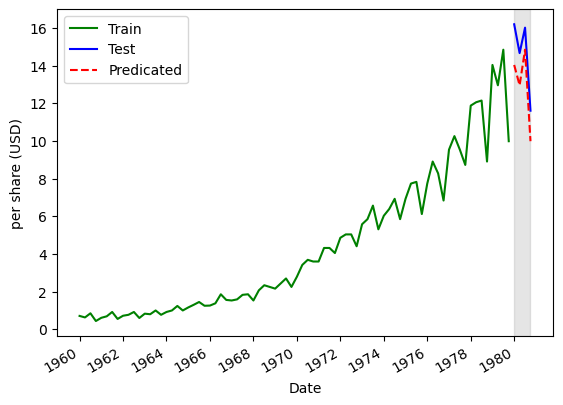

In [18]:
fig, ax = plt.subplots()

ax.plot(train["date"], train["data"], "g-", label="Train")
ax.plot(test["date"], test["data"], "b-", label="Test")
ax.plot(test["date"], test["pred_last_season"], "r--", label="Predicated")

ax.set_xlabel("Date")
ax.set_ylabel("per share (USD)")
ax.axvspan(80,83, color="#808080", alpha=0.2)
ax.legend(loc=2)

plt.xticks(
    np.arange(0, 85, 8),
    [1960, 1962, 1964, 1966, 1968, 1970, 1972, 1974, 1976, 1978, 1980]
)

fig.autofmt_xdate()
plt.tight_layout

## 참고사항

In [19]:
def simulate_process(is_stationary):
    np.random.seed(42)
    process = np.empty(400)
    
    if is_stationary:
        alpha = 0.5
        process[0] = 0
    else:
        alpha = 1
        process[0] = 10

    for i in range(400):
        if i + 1 < 400:
            process[i + 1] = alpha * process[i] + np.random.standard_normal()
        else:
            break

    return process

In [20]:
stationary = simulate_process(True)
non_stationary = simulate_process(False)

<function matplotlib.pyplot.tight_layout(*, pad: 'float' = 1.08, h_pad: 'float | None' = None, w_pad: 'float | None' = None, rect: 'tuple[float, float, float, float] | None' = None) -> 'None'>

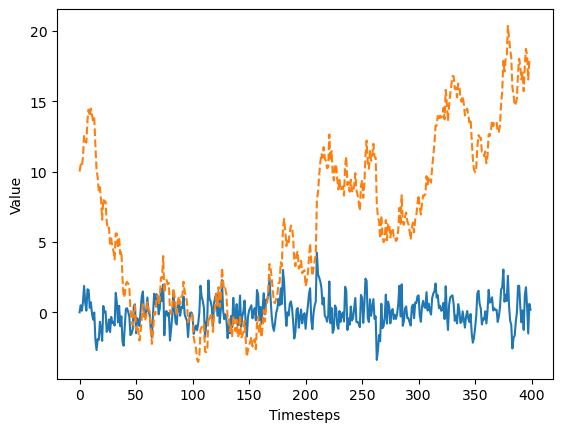

In [21]:
fig, ax = plt.subplots()

ax.plot(stationary, linestyle="-", label="stationary")
ax.plot(non_stationary, linestyle="--", label="stationary")
ax.set_xlabel("Timesteps")
ax.set_ylabel("Value")
plt.tight_layout

In [22]:
np.random.seed(42)
steps = np.random.standard_normal(1000)
steps[0] = 0
random_walk = np.cumsum(steps)

<function matplotlib.pyplot.tight_layout(*, pad: 'float' = 1.08, h_pad: 'float | None' = None, w_pad: 'float | None' = None, rect: 'tuple[float, float, float, float] | None' = None) -> 'None'>

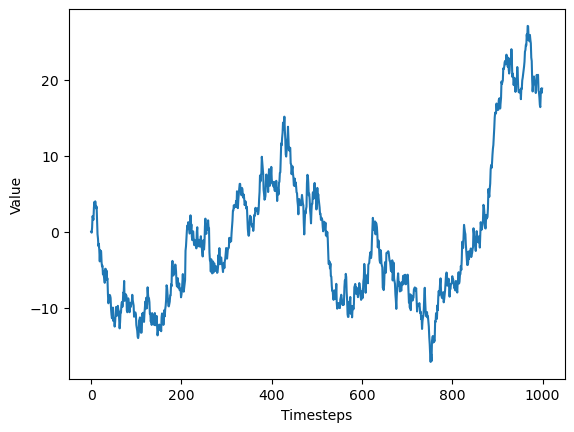

In [23]:
fig, ax = plt.subplots()

ax.plot(random_walk, linestyle="-", label="stationary")
ax.set_xlabel("Timesteps")
ax.set_ylabel("Value")
plt.tight_layout

In [24]:
ADF_result = adfuller(random_walk)
print(ADF_result[0], ADF_result[1])

-0.9659524876918751 0.7654789696692581


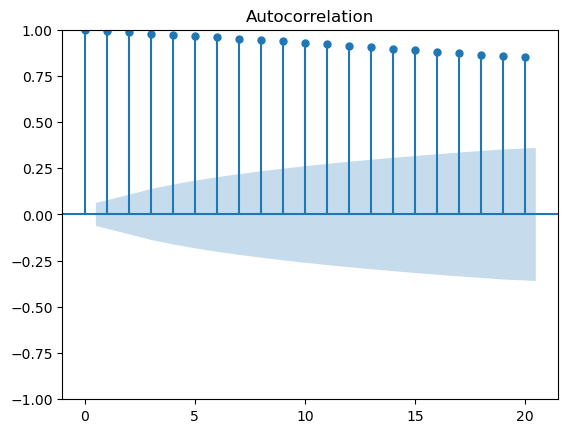

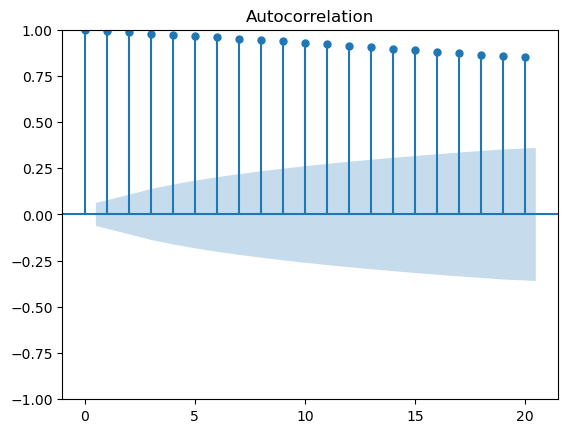

In [25]:
plot_acf(random_walk, lags=20)

In [26]:
diff_random_walk = np.diff(random_walk, n=1)

<function matplotlib.pyplot.tight_layout(*, pad: 'float' = 1.08, h_pad: 'float | None' = None, w_pad: 'float | None' = None, rect: 'tuple[float, float, float, float] | None' = None) -> 'None'>

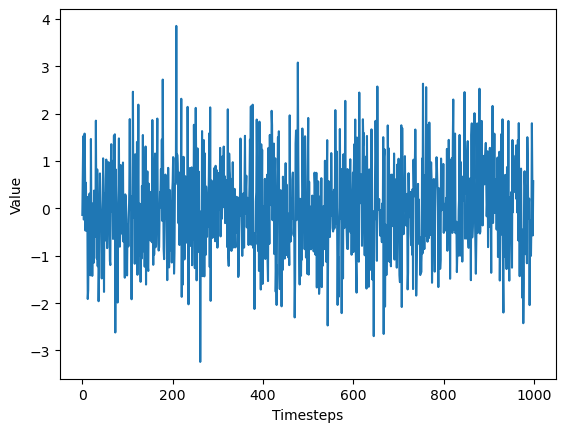

In [27]:
fig, ax = plt.subplots()

ax.plot(diff_random_walk, linestyle="-", label="stationary")
ax.set_xlabel("Timesteps")
ax.set_ylabel("Value")
plt.tight_layout

In [28]:
ADF_result = adfuller(diff_random_walk)
print(ADF_result[0], ADF_result[1])

-31.789310857560615 0.0


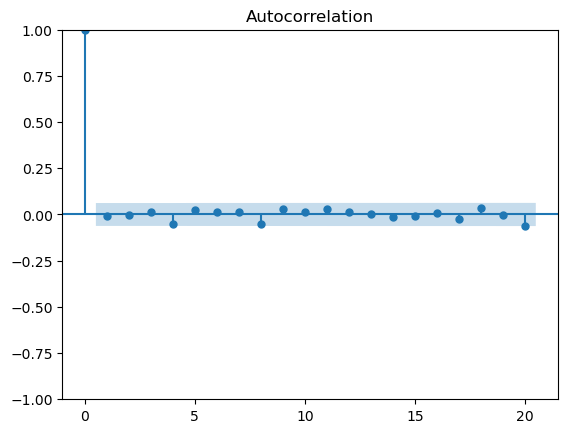

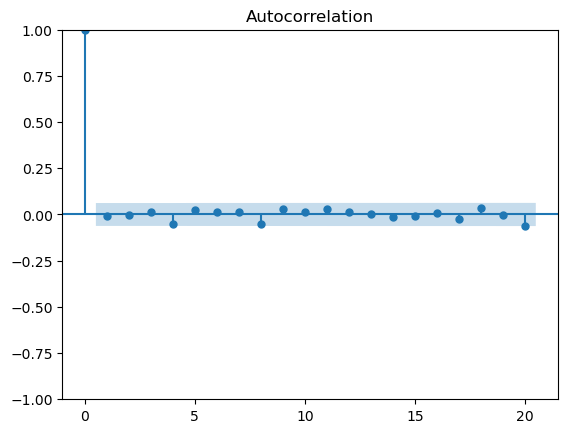

In [29]:
plot_acf(diff_random_walk, lags=20)